In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

#https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0#:~:text=Collinear%20features%20are%20features%20that,variance%20and%20less%20model%20interpretability.

In [2]:
%pwd

'/Users/taracelesta/DSI/projects/project_2'

In [3]:
train = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/train.csv')
test = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/test.csv')

# Data Cleaning & Exploring

In [4]:
train.shape, test.shape

((2051, 81), (878, 80))

In [5]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


**Discovering what each column represents**

In [6]:
#http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

Property size measures from Data Documentation:
- Lot Area (Continuous): Lot size in square feet
- BsmtFin SF 1 (Continuous): Type 1 finished square feet
- BsmtFin SF 2 (Continuous): Type 2 finished square feet
- Bsmt Unf SF (Continuous): Unfinished square feet of basement area
- Total Bsmt SF (Continuous): Total square feet of basement area
- 1st Flr SF (Continuous): First Floor square feet
- 2nd Flr SF (Continuous): Second floor square feet
- Low Qual Fin SF (Continuous): Low quality finished square feet (all floors)
- Gr Liv Area (Continuous): Above grade (ground) living area square feet

Location measures from Data Documentation:
- Neighborhood (Nominal): Physical locations within Ames city limits
- map avalible at https://www.cityofames.org/home/showdocument?id=1024

**Discovering if values are better represented as categorical or continuous.**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [8]:
#dropping columns with less than 150 observations.

train.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)

In [9]:
test.drop(columns=['Alley', 'Pool QC', 'Misc Feature'], inplace=True)

## Data Cleaning: Decide how to impute null values.

In [10]:
train.isnull().sum()

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            55
Bsmt Cond            55
Bsmt Exposure        58
BsmtFin Type 1       55
BsmtFin SF 1          1
BsmtFin Type 2       56
BsmtFin SF 2          1
Bsmt Unf SF           1
Total Bsmt SF         1
Heating               0
Heating QC            0
Central Air     

**Determining what missing values mean.**

Column_name: #of nulls/data type: column_description: null_description
- Fence: 1651 object: No Fence
- Garage Qual: 114/object: Garage quality: No Garage
- Garage Cond: 114/object: Garage condition: No Garage
- Fireplace Qu: 1000/object: Fireplace quality: No Fireplace
- Garage Type: 113/object: Garage location: No Garage
- Garage Finish: 114/object: Interior finish of the garage: No Garage
- Bsmt Qual: 55/object: Evaluates the height of the basement: No Basement
- Bsmt Cond: 55/object: Evaluates the general condition of the basement: No Basement
- Bsmt Exposure: 58/object: Walkout or garden level walls: No Basement
- BsmtFin Type 1: 55/object: No Basement
- Lot Frontage: 330/float: Linear feet of street connected to property
- Garage Yr Blt: 114/float: Year garage was built

In [11]:
#exploring Lot Frontage nulls
train['Lot Frontage'].describe()

count    1721.000000
mean       69.055200
std        23.260653
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [12]:
#imputing Lot Frontage nulls with mean
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(), inplace = True)

In [13]:
test['Lot Frontage'].fillna(test['Lot Frontage'].mean(), inplace = True)

In [14]:
#exploring Garage Yr Blt
#I assume Nan's mean there is no garage so I will not impute or delete
train['Garage Yr Blt'].sort_values()

1793    1895.0
410     1896.0
217     1900.0
520     1900.0
12      1900.0
1359    1910.0
717     1910.0
1301    1910.0
1235    1910.0
1407    1910.0
1993    1914.0
425     1914.0
149     1915.0
698     1915.0
1645    1915.0
1312    1915.0
1417    1916.0
831     1916.0
107     1916.0
16      1916.0
1083    1916.0
723     1917.0
206     1918.0
1804    1919.0
804     1920.0
325     1920.0
408     1920.0
77      1920.0
1861    1920.0
336     1920.0
495     1920.0
1844    1920.0
312     1920.0
1640    1920.0
63      1920.0
1159    1920.0
1039    1920.0
1658    1920.0
974     1920.0
738     1920.0
1698    1920.0
258     1920.0
80      1920.0
1842    1920.0
656     1920.0
1643    1921.0
1145    1921.0
855     1921.0
443     1921.0
1076    1922.0
1486    1922.0
843     1922.0
1292    1922.0
873     1922.0
2035    1922.0
1443    1923.0
244     1923.0
341     1923.0
1369    1923.0
919     1923.0
76      1924.0
1996    1924.0
2005    1924.0
1010    1924.0
1077    1925.0
1716    1925.0
1452    19

In [15]:
#Imputing Total Bsmt SF Nan to 0
train['Total Bsmt SF'].sort_values()
#1327 NaN

1022       0.0
183        0.0
1889       0.0
1377       0.0
737        0.0
1331       0.0
146        0.0
772        0.0
1933       0.0
790        0.0
794        0.0
114        0.0
1270       0.0
1256       0.0
1252       0.0
93         0.0
1222       0.0
1211       0.0
1157       0.0
1125       0.0
696        0.0
1387       0.0
1875       0.0
1428       0.0
390        0.0
1686       0.0
1684       0.0
1681       0.0
437        0.0
1620       0.0
485        0.0
1594       0.0
499        0.0
924        0.0
514        0.0
581        0.0
256        0.0
249        0.0
1481       0.0
240        0.0
616        0.0
635        0.0
642        0.0
1859       0.0
580        0.0
933        0.0
700        0.0
1098       0.0
12         0.0
954        0.0
1007       0.0
1049       0.0
2010       0.0
1089       0.0
35       160.0
1793     173.0
1178     190.0
464      192.0
692      216.0
54       216.0
103      245.0
1235     264.0
950      264.0
1374     270.0
952      279.0
432      290.0
869      2

In [16]:
#imputing mean for Total Bsmt SF column
train.replace({'Total Bsmt SF': np.nan}, {'Total Bsmt SF': 0}, inplace = True)

In [17]:
test.replace({'Total Bsmt SF': np.nan}, {'Total Bsmt SF': 0}, inplace = True)

In [18]:
train['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

In [19]:
#imputing mean for Garage Area column
train['Garage Area'].fillna(train['Garage Area'].mean(), inplace = True)

In [20]:
test['Garage Area'].fillna(test['Garage Area'].mean(), inplace = True)

In [21]:
train['Mas Vnr Area'].describe()
#Masonry veneer area in square feet

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64

In [22]:
train.replace({'Mas Vnr Area': np.nan}, {'Mas Vnr Area': 0}, inplace = True)

In [23]:
#dont think I will use so no need to change nulls
train['Garage Yr Blt'].isnull().sum()

114

## Data Cleaning: Outliers

**Noticing any unusual positive of negative numbers.**

In [24]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,98.626524,442.300488,47.959024,567.728293,1057.471965,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,21.306357,6742.488909,1.426271,1.104497,30.177889,21.036250,174.324690,461.204124,165.000901,444.954786,449.908003,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.881887,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,69.055200,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.000000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,159.000000,733.750000,0.000000,811.000000,1318.500000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [25]:
train.describe(include=np.object)

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Fence,Sale Type
count,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2051,2029,2051,2051,2051,1996,1996,1993,1996,1995,2051,2051,2051,2051,2051,2051,1051,1938,1937,1937,1937,2051,400,2051
unique,7,2,4,4,3,5,3,28,9,8,5,8,6,6,15,15,4,4,5,6,5,5,4,6,6,5,5,2,5,4,8,5,6,3,5,5,3,4,9
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,MnPrv,WD
freq,1598,2044,1295,1843,2049,1503,1953,310,1767,2025,1700,1059,1619,2025,724,721,1218,1247,1778,926,887,1834,1339,615,1749,2018,1065,1910,1868,1047,1915,523,1213,849,1832,1868,1861,227,1781


**Looking at histograms to see how column data is distributed. Noticing any tails that would indicate outliers.**


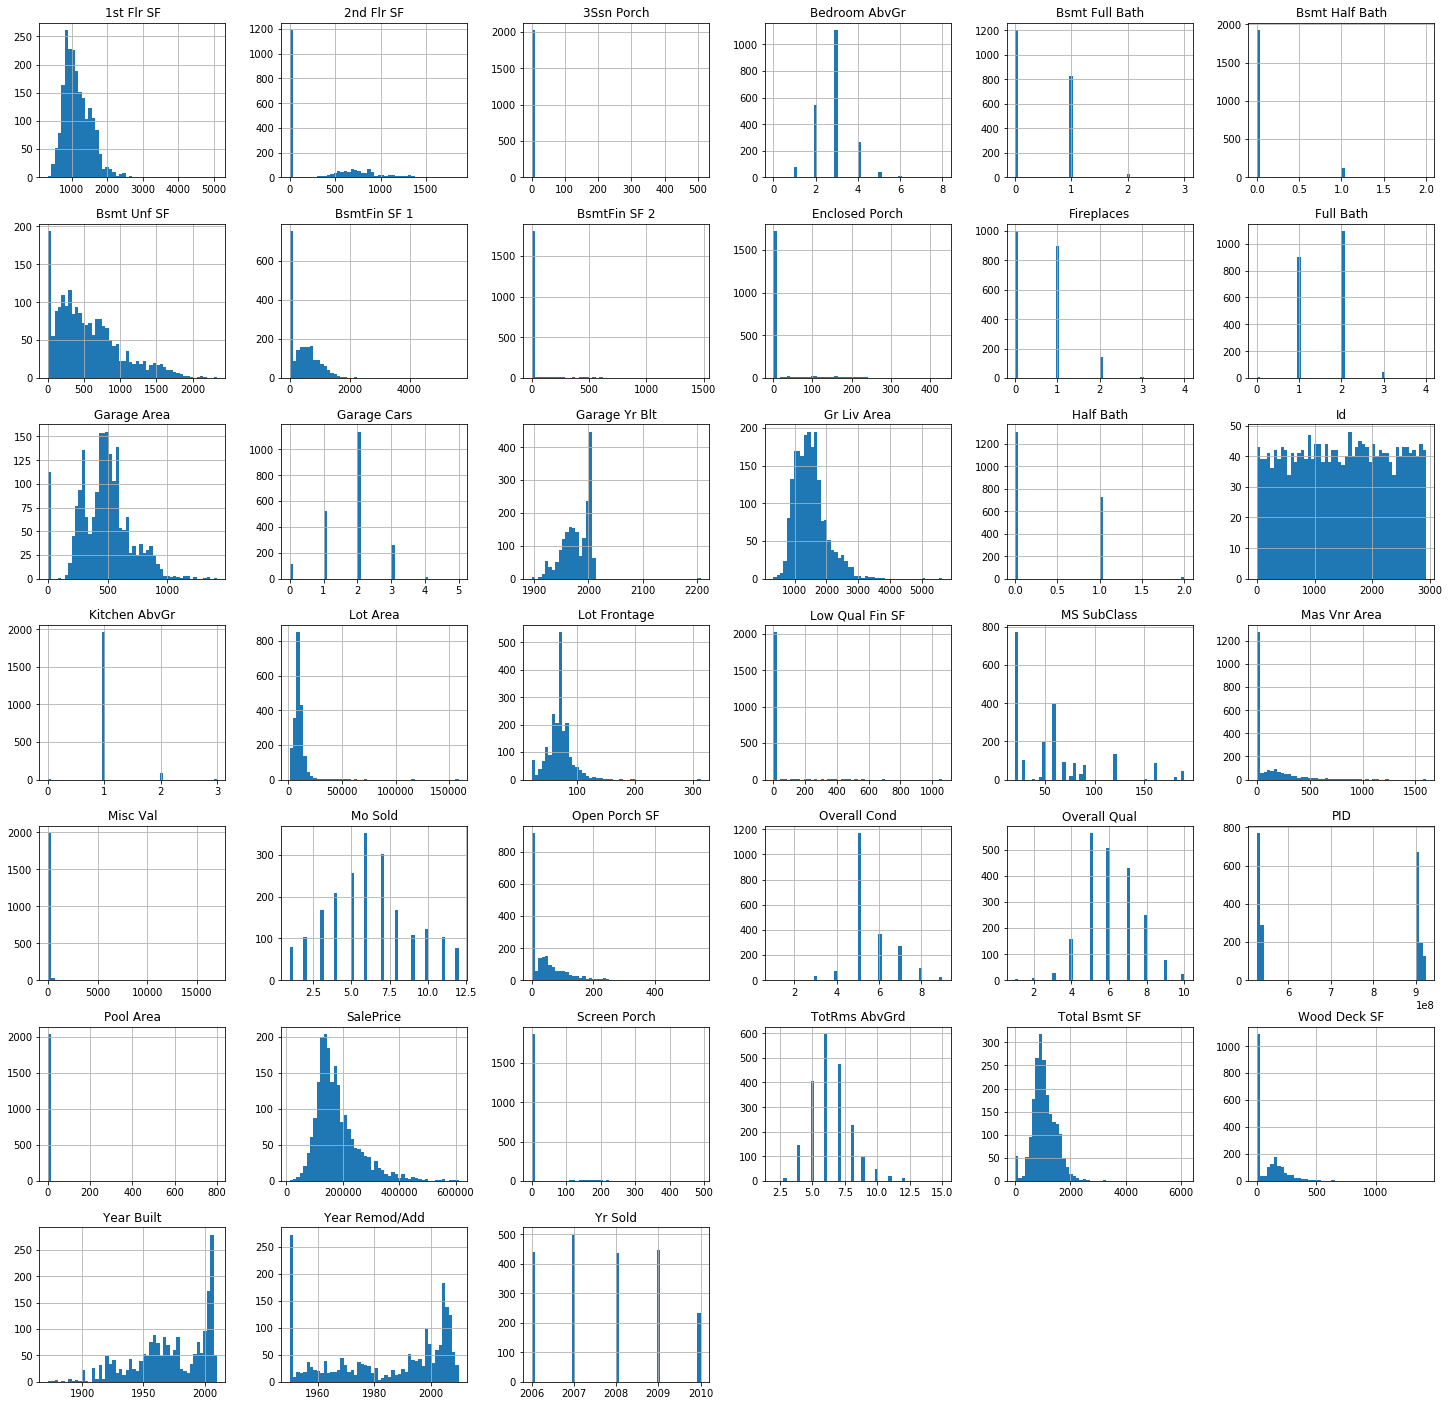

In [26]:
train.hist(bins=50, figsize=(25,25))
plt.savefig("attribute_histogram_plots")
plt.show()

**Boxplotting trouble histogram columns to better see outliers**

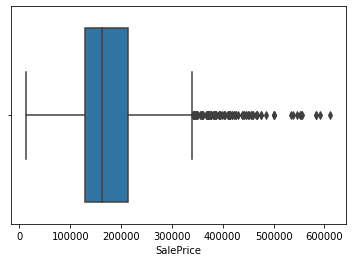

In [27]:
sns.boxplot(x=train['SalePrice'])

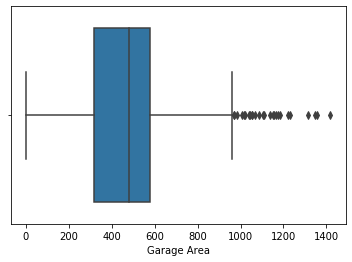

In [28]:
sns.boxplot(x=train['Garage Area']) 

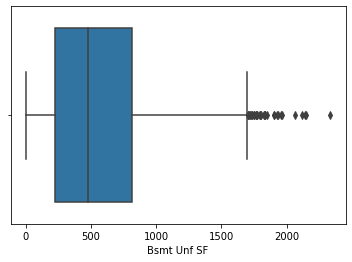

In [29]:
sns.boxplot(x=train['Bsmt Unf SF']) 

**Identifying Outliers**

In [30]:
#Identify outliers
#code inspiration from: https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623

def find_outliers(Q1, Q3, data):
# Q3 = 75%
# Q1 = 25%
    IQR = Q3 - Q1
    upper_limit = Q3 + (1.5* IQR)
    lower_limit = Q1 - (1.5 * IQR)
    
    lower_outliers = []
    upper_outliers = []
    
    for outlier in data:
        if outlier > upper_limit: 
            upper_outliers.append(outlier)
        if outlier < lower_limit:
            lower_outliers.append(outlier)
    
    print(f'Lower outliers are: {sorted(lower_outliers)}')
    print(f'Upper outliers are: {sorted(upper_outliers)}')

In [31]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [32]:
find_outliers(11.773943, 12.273731, train['SalePrice'])

Lower outliers are: []
Upper outliers are: [12789, 13100, 34900, 35000, 35311, 37900, 39300, 40000, 44000, 45000, 50000, 50138, 51689, 52000, 52500, 55000, 55000, 55993, 57625, 60000, 60000, 61000, 61500, 62383, 62500, 63000, 63900, 64000, 64000, 64500, 64500, 64500, 65000, 66500, 67000, 67000, 68000, 68104, 68400, 68500, 72000, 72000, 73000, 73000, 75000, 75000, 75200, 76000, 76500, 76500, 78000, 78000, 78500, 79000, 79000, 79000, 79275, 79400, 79500, 80000, 80000, 80000, 80000, 80000, 80000, 81000, 81000, 81400, 81500, 82000, 82000, 82000, 82000, 82375, 82500, 82500, 82500, 83000, 83000, 84500, 84500, 84900, 84900, 85000, 85000, 85000, 85000, 85000, 85400, 85500, 85500, 86000, 86900, 86900, 87000, 87000, 87000, 87500, 87500, 87550, 88000, 88000, 88750, 89000, 89000, 89000, 89500, 89500, 89900, 90000, 90000, 90000, 90000, 90000, 90350, 90500, 91000, 91000, 91000, 91300, 91500, 91500, 91900, 92000, 92900, 93000, 93000, 93000, 93500, 93500, 93850, 93900, 94000, 94000, 94550, 94900, 9500

Decision made to log salesprice before testing as there are so many outliers for more accutate results.

## Data Exploration: combining features and interaction terms 

In [33]:
#finding neighborhoods by sales price
train.groupby('Neighborhood', as_index=True)['SalePrice'].mean()

Neighborhood
Blmngtn    200417.681818
Blueste    144566.666667
BrDale     103371.052632
BrkSide    127022.697368
ClearCr    217490.074074
CollgCr    202497.216667
Crawfor    205901.211268
Edwards    130493.468531
Gilbert    189228.387931
Greens     188666.666667
GrnHill    280000.000000
IDOTRR     101103.188406
Landmrk    137000.000000
MeadowV    100231.250000
Mitchel    167656.707317
NAmes      145905.816129
NPkVill    140476.470588
NWAmes     194619.022989
NoRidge    316294.125000
NridgHt    322831.352459
OldTown    125276.300613
SWISU      134758.875000
Sawyer     137181.909910
SawyerW    187760.160920
Somerst    227183.900000
StoneBr    329675.736842
Timber     241051.354167
Veenker    253570.588235
Name: SalePrice, dtype: float64

In [34]:
train.groupby('Neighborhood', as_index=True)['SalePrice'].median()

Neighborhood
Blmngtn    192250
Blueste    137500
BrDale     105500
BrkSide    128000
ClearCr    225000
CollgCr    200000
Crawfor    199500
Edwards    125000
Gilbert    180750
Greens     190000
GrnHill    280000
IDOTRR     102000
Landmrk    137000
MeadowV     92450
Mitchel    160000
NAmes      141000
NPkVill    143000
NWAmes     185000
NoRidge    300750
NridgHt    317500
OldTown    120000
SWISU      136200
Sawyer     135000
SawyerW    181000
Somerst    224000
StoneBr    322450
Timber     220000
Veenker    260000
Name: SalePrice, dtype: int64

In [35]:
#Creating price per sq ft per neighborhood to compare to price
#code inspiration from: https://medium.com/@hjhuney/quantitative-data-exploration-for-regression-in-python-ames-housing-part-1-25879dd4cc4a

train['TotalLivingSF'] = train['Gr Liv Area'] + train['Total Bsmt SF'] - train['Low Qual Fin SF']

In [36]:
test['TotalLivingSF'] = test['Gr Liv Area'] + test['Total Bsmt SF'] - test['Low Qual Fin SF']

In [37]:
train.groupby('Neighborhood', as_index=True)['SalePrice'].mean()  / train.groupby('Neighborhood', as_index=True)['TotalLivingSF'].mean()

Neighborhood
Blmngtn     72.808154
Blueste     73.440014
BrDale      64.317058
BrkSide     62.881704
ClearCr     72.927957
CollgCr     76.047041
Crawfor     74.906929
Edwards     58.378485
Gilbert     75.796425
Greens      76.943991
GrnHill    130.262852
IDOTRR      53.801933
Landmrk     70.256410
MeadowV     57.469301
Mitchel     68.444937
NAmes       62.873391
NPkVill     64.258422
NWAmes      65.681825
NoRidge     81.869459
NridgHt     90.217048
OldTown     56.665345
SWISU       57.604649
Sawyer      65.514996
SawyerW     71.144815
Somerst     82.357997
StoneBr     93.764430
Timber      79.865160
Veenker     77.865284
dtype: float64

In [38]:
#Explore age by sales
train.groupby('Year Built', as_index=True)['SalePrice'].mean()  / train.groupby('Neighborhood', as_index=True)['TotalLivingSF'].mean()
train.groupby('Year Built', as_index=True)['SalePrice'].median()

Year Built
1872    122000.0
1875     94000.0
1879    185000.0
1880    131000.0
1885    122500.0
1890    124900.0
1892    475000.0
1893    325000.0
1895    119600.0
1896     50138.0
1898    106000.0
1900    129000.0
1901    115000.0
1905    129950.0
1908    127000.0
1910    114252.0
1911    130000.0
1912    135900.0
1913     90350.0
1914    138887.0
1915    140000.0
1916    140000.0
1917    124250.0
1918    114000.0
1919    119500.0
1920    108500.0
1921    141500.0
1922     87000.0
1923    149954.5
1924    107000.0
1925    125750.0
1926    117950.0
1927    121250.0
1928    147000.0
1929    131000.0
1930    114500.0
1931    138250.0
1932    199500.0
1934    122150.0
1935    128900.0
1936    123900.0
1937    157000.0
1938    126000.0
1939    132000.0
1940    127500.0
1941    112500.0
1942    130000.0
1945    113000.0
1946     88750.0
1947    121250.0
1948    130500.0
1949    133500.0
1950    128375.0
1951    134800.0
1952    125000.0
1953    133000.0
1954    126250.0
1955    127250.0
195

In [39]:
#creating SqFt + Quality column
train['SqFt Interaction Qual'] = train['TotalLivingSF'] * train['Overall Qual']

In [40]:
test['SqFt Interaction Qual'] = test['TotalLivingSF'] * test['Overall Qual']

In [41]:
#creating Total Bath column
half_bath_total = (train['Bsmt Half Bath'] + train['Half Bath'])/2
train['TotalBath'] = train['Bsmt Full Bath'] + train['Full Bath'] + half_bath_total

In [42]:
half_bath_total = (test['Bsmt Half Bath'] + test['Half Bath'])/2
test['TotalBath'] = test['Bsmt Full Bath'] + test['Full Bath'] + half_bath_total

## Data Exploration: finding corrilations

In [43]:
#standard scaling: bring all features to same plane
#first calculate mean and std: or z score
#standard scare fit method: takes data and calculates, for train
#transform: applies calculation to data, only train
#train test split: 

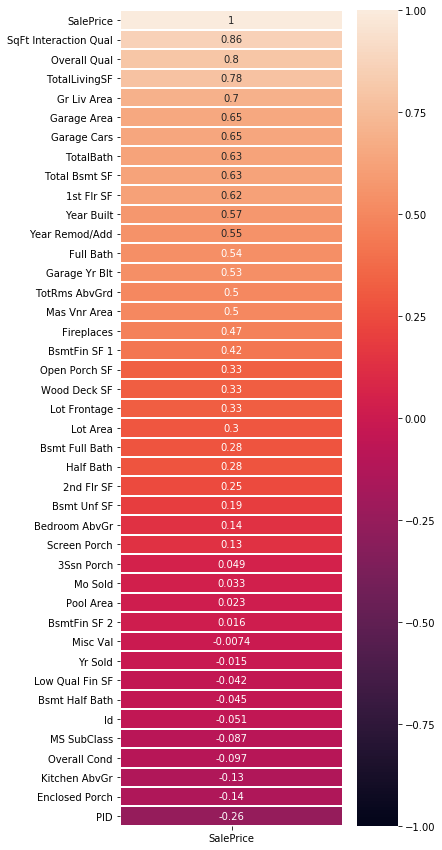

In [44]:
#look at all corrilations to Sale Price
cor = train.corr()

# sns.color_palette("rocket")

plt.figure(figsize=(5,15))
sns.heatmap(cor[['SalePrice']].sort_values('SalePrice', ascending = False),
            annot=True,
            vmin=-1,
            vmax=1,
            linewidths=1, 
            linecolor='white')

In [45]:
#code inspiration from https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
cor_target = abs(cor['SalePrice'])
relevant_features = cor_target[cor_target > 0.5]
relevant_features.sort_values()

relevant_df = pd.DataFrame(relevant_features)

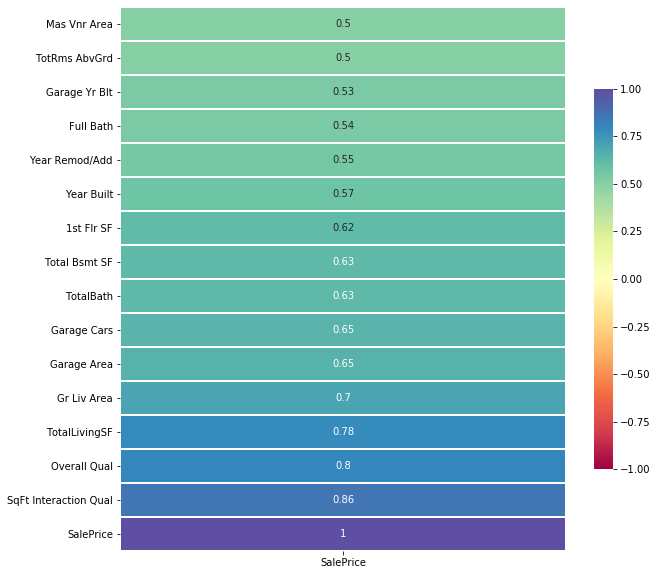

In [46]:
#plotting relevant features
plt.figure(figsize=(10,10))
sns.heatmap(relevant_df.sort_values('SalePrice', ascending = True),
            annot=True,
            vmin=-1,
            vmax=1,
            cmap = "Spectral",
            linewidths=1, 
            linecolor='white',
            cbar_kws={"shrink": .70})


In [47]:
train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', '

In [48]:
# Finding high corrilation features that contracting company can do

# Complete home upgrade: Overall Cond, 'Overall Qual'

# 2nd floor addition: 2nd Flr SF, 'Bedroom AbvGr', 'MS SubClass'(060),'House Style':(2Story)(2.5Fin), Gr Liv Area,  TotRmsAbvGrd

# Basement Finish:'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',

# Kitchen Remodel:'Kitchen AbvGr', 'Kitchen Qual'

# Bathroom Addition: 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath'

# Garage Addition: 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars','Garage Area', 'Garage Qual', 'Garage Cond',

# Deck Addition: 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch'


cor_target = abs(cor['SalePrice'])
relevant_contracting_features = cor_target[cor_target > 0.5]
relevant_contracting_features.sort_values()

relevant_df = pd.DataFrame(contracting_features)

NameError: name 'contracting_features' is not defined

In [ ]:
#how do i change this to only show relevant features?
cols = ['TotRms AbvGrd', 'Mas Vnr Area', 'Garage Yr Blt', 'Full Bath', 'Year Remod/Add','Year Built','1st Flr SF', 'Total Bsmt SF','Garage Cars','Garage Area','Gr Liv Area','TotalLivingSF','Overall Qual']

plt.figure(figsize=(20,20))
sns.heatmap(cor, cmap=plt.cm.Reds, linewidths=1, linecolor='white',)
plt.show()

In [ ]:
#checking independance
print(train[["Year Built","Year Remod/Add"]].corr())  
#High corrilation so I will drop one 
#Keep Year Build as it's corrilation with Sales Price is Higher

print(train[["Overall Qual","TotalLivingSF"]].corr())
#High corrilation so I will drop one 
#Keep Overall Qual as it's corrilation with Sales Price is Higher

print(train[["Garage Area","Garage Cars"]].corr())
#High corrilation so I will drop one 
#Keep Garage Area as it's corrilation with Sales Price is Higher

print(train[["1st Flr SF","Total Bsmt SF"]].corr())
#High corrilation so I will drop one 
#Keep Total Bsmt SF as it's corrilation with Sales Price is Higher

# Relevant Features Left = 
# TotRms AbvGrd     0.504014
# Mas Vnr Area      0.512230
# Garage Yr Blt     0.533922
# Full Bath         0.537969
# Year Built        0.571849
# Total Bsmt SF     0.629303
# TotalBath         0.629500
# Garage Area       0.650270
# Gr Liv Area       0.697038
# Overall Qual      0.800207

In [ ]:
print(train[["TotalBath","Gr Liv Area"]].corr())

In [ ]:
#High Independance
print(train[["Garage Area","Gr Liv Area"]].corr())
print(train[["Mas Vnr Area","Year Built"]].corr())

In [ ]:
#highest corrilations are Overall Qual, TotalLivingSF, GrLivArea, Garage Area, Garage Cars, Total Bsmt SF, 1st Flr SF
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Overall Qual', 'Gr Liv Area', 'Garage Area']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['TotalBath','Total Bsmt SF','Year Built']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['Full Bath', 'Garage Yr Blt', 'Mas Vnr Area' ,'TotRms AbvGrd']);
sns.pairplot(train, y_vars=['SalePrice'], 
             x_vars=['TotalLivingSF', 'Garage Cars','1st Flr SF', 'Year Remod/Add']);


# TotRms AbvGrd     0.504014
# Mas Vnr Area      0.512230
# Garage Yr Blt     0.533922
# Full Bath         0.537969

In [ ]:
train['TotalBath'].isnull().sum()

In [ ]:
train['TotalBath'].fillna(train['TotalBath'].mean(), inplace = True)

In [ ]:
test['TotalBath'].fillna(test['TotalBath'].mean(), inplace = True)

# Suggestions

**Automated feature selection**

In [ ]:
#how to automated feature selection?

## Pre-processing
- One-hot encode categorical variables.
- Train/test split your data.
- Scale your data.
- Consider using automated feature selection.

# Submission 4
### log 'SalePrice' vs. ': 


### Pre-processing

**One-hot encode categorical variables**

Define Feature Matrix & Target

In [58]:
X = train[['Overall Qual', 'Total Bsmt SF', 'Year Built']]
y = train['SalePrice']

**Train/test split data**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

**Scale data**

In [60]:
ss = StandardScaler()
Xs_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Instantiate, Fit, Score, Model

In [61]:
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
lr.score(Xs_train, y_train)

0.6867098530643994

In [63]:
lr.score(X_test, y_test)

0.7365281690573736

In [64]:
cross_val_score(lr,Xs_train, y_train).mean()  

0.6760962366609957

Class With Caroline

In [65]:
sum(lr.coef_)

75588.64869536262

In [66]:
lr.coef_

array([47629.98475285, 19312.8613227 ,  8645.80261981])

In [ ]:
lr.predict(X_test)

In [ ]:
X.head()

In [ ]:
test.head(2)

## Work With Heather

In [ ]:
K_test = test[['Overall Qual', 'Gr Liv Area', 'TotalBath', 'Total Bsmt SF', 'Year Built']]

In [ ]:
K_final = ss.transform(K_test)

Create Predictions

In [ ]:
lr.predict(K_final)

Create our Submission Dataframe

In [ ]:
submission = pd.DataFrame({'Id' : test['Id'],
                          'SalePrice' : k_preds})

In [ ]:
submission.head()

In [ ]:
submission.shape

View Correct Submission Format

https://generalassembly.zoom.us/rec/play/5_UPKQxWjl7iKfjck6HDAO0qAFBHd8PNaq-CuEh84w8Jt1OG5qrYW8twv29w4MgCLMhHvU0uvRKdquuG.fE4dNW4SrQ9FAMgz?continueMode=true&_x_zm_rtaid=TiH20KGSRXuZ2HN_OkbVIw.1601760176827.c2e19c7537a22f257f1b46c763e9b860&_x_zm_rhtaid=662
  Passcode: ZvkA4+.4

In [ ]:
sample_submission = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/sample_sub_reg.csv')

sample_submission.shape

In [ ]:
sample_submission.head()

Export as a CSV

In [ ]:
submission.to_csv('my_submission_4_1.csv', index = False)

View Correct Submission Format

https://generalassembly.zoom.us/rec/play/5_UPKQxWjl7iKfjck6HDAO0qAFBHd8PNaq-CuEh84w8Jt1OG5qrYW8twv29w4MgCLMhHvU0uvRKdquuG.fE4dNW4SrQ9FAMgz?continueMode=true&_x_zm_rtaid=TiH20KGSRXuZ2HN_OkbVIw.1601760176827.c2e19c7537a22f257f1b46c763e9b860&_x_zm_rhtaid=662
  Passcode: ZvkA4+.4

# Submission 3
### log 'SalePrice' 
### vs. 
### 'Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Year Built', 'TotRms AbvGrd','Mas Vnr Area', 'Full Bath'

### Pre-processing

**One-hot encode categorical variables**

In [ ]:
#train['Overall Qual'] and train['Gr Liv Area'] are not categorical.

Define Feature Matrix & Target

In [ ]:
train['SalePrice'] = train['SalePrice'].map(np.log)
features = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Year Built', 'TotRms AbvGrd','Mas Vnr Area', 'Full Bath'] 
X = train[features]
y = train['SalePrice']

In [ ]:
# train['SalePrice'] = train['SalePrice']
# features = ['Overall Qual', 'Gr Liv Area'] 
# X = train[features]
# y = train['SalePrice']

**Train/test split data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

Instantiate, Fit, Score, Model

In [ ]:
lr = LinearRegression()

In [ ]:
#cross_val_score(lr, X_train, y_train).mean()
#0.7188865213793376

In [ ]:
cross_val_score(lr, X_train, y_train_log).mean()
#0.7361634380810216
#NEED TO BEAT 0.7974456987519838

In [ ]:
lr.fit(X_train,  y_train_log)

In [ ]:
lr.score(X_train, y_train_log)
#0.7413289224413979
#0.8050463388039586

In [ ]:
lr.score(X_test, y_test_log)
#0.7320265294844286
#0.7787647325960437

In [ ]:
cross_val_score(lr, X_train, y_train_log).mean()
#0.7361634380810216
#0.7974456987519838

Model Object

In [ ]:
#need to clean test dataframe
X_TEST_3 = test[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Area', 'Year Built']]

Create Predictions

In [ ]:
lr.predict(X_TEST_3)
# test['y_hat_3'] = lr.predict(X_TEST_3)
pred = lr.predict(X_TEST_3)

In [ ]:
test['y_hat_3'] = np.exp(pred)

test['final_3'] = np.exp(test['y_hat_3'])

In [ ]:
test.head(2)

View Sample Submission Format

In [ ]:
sample_submission = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/sample_sub_reg.csv')

sample_submission.shape

In [ ]:
sample_submission.head(2)

Create our Submission Dataframe

In [ ]:
test.shape

In [ ]:
submission_3 = pd.DataFrame({'Id' : test['Id'],
                          'SalePrice' : test['final_3']})

In [ ]:
submission_3.head()

In [ ]:
submission_3.shape

Export as a CSV

In [ ]:
submission_3.to_csv('my_submission_3_1.csv', index = False)

# Submission 2: 
### log 'SalePrice' vs. 'Overall Qual', 'TotalLivingSF', 'Year Remod/Add'

In [ ]:
#log sales price becasue of outliers before testing
#will need to y_test.map(np.log).map(np.exp).hist() to get answers after tests
#train['SalePrice'] = train['SalePrice'].map()

Define Feature Matrix & Target

In [ ]:
train['SalePrice'] = train['SalePrice'].map(np.log)
features = ['Overall Qual', 'TotalLivingSF', 'Year Remod/Add']
X = train[features]
y = train['SalePrice']

Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

In [ ]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)

Instantiate, Fit, Score, Model

In [ ]:
lr = LinearRegression()

In [ ]:
#cross_val_score(lr, X_train, y_train).mean()

In [ ]:
cross_val_score(lr, X_train, y_train_log).mean()
#0.776574230135032

In [ ]:
lr.fit(X_train,  y_train_log)

In [ ]:
lr.score(X_train, y_train_log)
#0.7839489187704136

In [ ]:
lr.score(X_test, y_test_log)
#0.7597667733155763

In [ ]:
cross_val_score(lr, X_train, y_train_log).mean()
#0.776574230135032

Model Object

In [ ]:
#need to clean test dataframe
X_TEST_2 = test[['Overall Qual', 'TotalLivingSF', 'Year Remod/Add']]

Create Predictions

In [ ]:
lr.predict(X_TEST_2)
test['y_hat2'] = lr.predict(X_TEST_2)

In [ ]:
test['y_hat_2'] = np.exp(pred)

test['final_2'] = np.exp(test['y_hat_2'])

In [ ]:
test.head(2)

View Sample Submission Format

In [ ]:
sample_submission = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/sample_sub_reg.csv')

sample_submission.shape

In [ ]:
sample_submission.head(2)

Create our Submission Dataframe

In [ ]:
test.shape

In [ ]:
submission_2 = pd.DataFrame({'Id' : test['Id'],
                          'SalePrice' : test['final_2']})

In [ ]:
submission_2.head()

In [ ]:
submission_2.shape

Export as a CSV

In [ ]:
submission_2.to_csv('my_submission_2.1.csv', index = False)

# Submission 1: Baseline

Define Feature Matrix & Target

In [ ]:
X = train[['1st Flr SF', '2nd Flr SF']]
y = train['SalePrice']

Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42)

Instantiate, Fit, Score, Model

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

Model Object

In [ ]:
#cant have any nulls
test['1st Flr SF'].isnull().sum(), test['2nd Flr SF'].isnull().sum()

In [ ]:
X_TEST = test[['1st Flr SF', '2nd Flr SF']]

Create Predictions

In [ ]:
lr.predict(X_TEST)

In [ ]:
test['y_hat'] = lr.predict(X_TEST)

In [ ]:
test.head(2)

View Correct Submission Format

https://generalassembly.zoom.us/rec/play/5_UPKQxWjl7iKfjck6HDAO0qAFBHd8PNaq-CuEh84w8Jt1OG5qrYW8twv29w4MgCLMhHvU0uvRKdquuG.fE4dNW4SrQ9FAMgz?continueMode=true&_x_zm_rtaid=TiH20KGSRXuZ2HN_OkbVIw.1601760176827.c2e19c7537a22f257f1b46c763e9b860&_x_zm_rhtaid=662
  Passcode: ZvkA4+.4

In [ ]:
sample_submission = pd.read_csv('/Users/taracelesta/DSI/projects/project_2/datasets/sample_sub_reg.csv')

sample_submission.shape

In [ ]:
sample_submission.head()

Create our Submission Dataframe

In [ ]:
test.shape

In [ ]:
submission = pd.DataFrame({'Id' : test['Id'],
                          'SalePrice' : test['y_hat']})

In [ ]:
submission.head()

In [ ]:
submission.shape

Export as a CSV

In [ ]:
submission.to_csv('my_submission_1.csv', index = False)